In [102]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NeighborhoodComponentsAnalysis
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [103]:
# load numpy array from npy file
images = load('images.npy')
labels = load('labels.npy')

Text(0.5, 1.0, '(Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Label: bustier/hourglass)')
Text(0.5, 1.0, '(Label: tshirt/straight)')


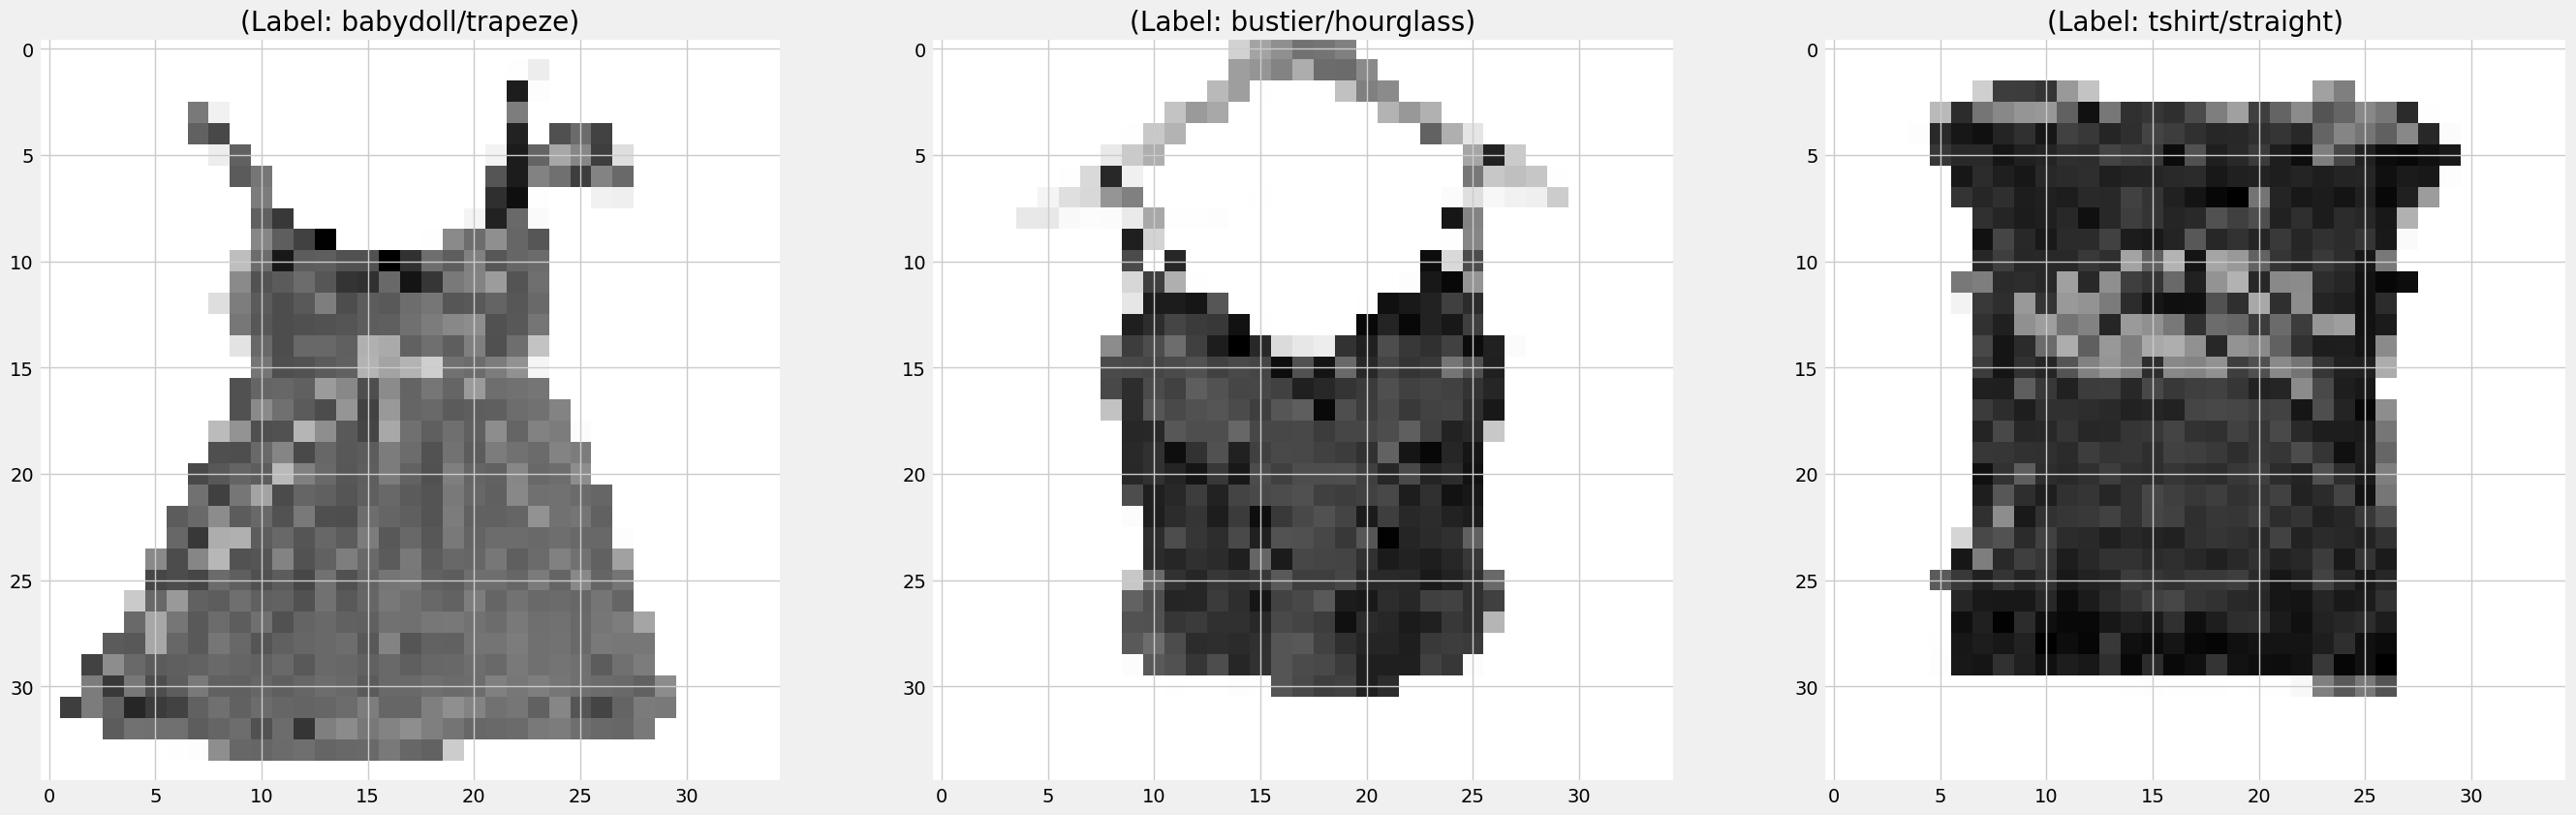

In [105]:
# plot first image of each class

label_list = {
    0: 'babydoll/trapeze',
    1: 'bustier/hourglass',
    2: 'tshirt/straight',
}

 # first image of each class
values = [0, 435, 870]

%matplotlib inline

plt.figure(figsize = [30,15])

for i in range(3):
    plt.subplot(1,3,i+1)
    im = np.reshape(images[values[i]],(35,35))
    plt.imshow(im, cmap='gray_r')
    print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

In [110]:
# choosing train test split to test optimal parameters for classification methods
# train size = 0.85 because dataset is small

xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

In [111]:
# use gridsearchcv with RAW DATA to determine optimal size K
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
distance = [2]
param_grid = dict(n_neighbors=k_range, p=distance)
  
# defining parameter range
# cv =5 cross validation folds for each k value
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


Accuracy for our training dataset with tuning is : 83.68%
{'n_neighbors': 3, 'p': 2}


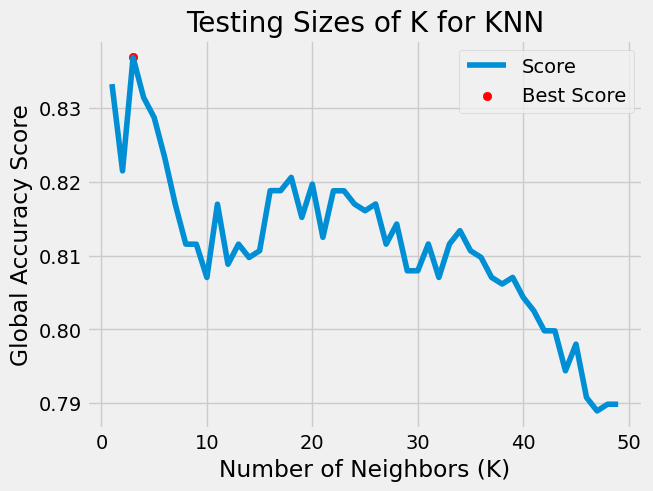

In [114]:
# optimal size k
allgridscores = list(grid_search.cv_results_['mean_test_score'])
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(grid_search.best_score_ *100) )
print(grid_search.best_params_)

plt.plot(k_range, allgridscores, label='Score')
plt.scatter(k_range[2], allgridscores[2], label='Best Score', color='red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Global Accuracy Score')
plt.title('Testing Sizes of K for KNN')
plt.legend()

In [115]:
# find optimal params for non-linear svm using raw data
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
svm_grid=GridSearchCV(svc,param_grid, scoring='accuracy', verbose=1)

# fitting the model for grid search
svm_gridsearch = svm_grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [116]:
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(svm_gridsearch.best_score_ *100) )
print(svm_gridsearch.best_params_)

Accuracy for our training dataset with tuning is : 89.18%
{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [117]:
results_svm = svm_gridsearch.cv_results_
svmtable = pd.DataFrame(results_svm)
svmtable.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1, inplace=True)
svmtable = svmtable.sort_values(by=['rank_test_score']).head(10)
# to add to pdf
print(svmtable.to_latex(index=False,
                  float_format="{:.5f}".format,))

\begin{tabular}{rrrrlllrrr}
\toprule
 mean\_fit\_time &  std\_fit\_time &  mean\_score\_time &  std\_score\_time & param\_C & param\_gamma & param\_kernel &  mean\_test\_score &  std\_test\_score &  rank\_test\_score \\
\midrule
       0.91186 &       0.02651 &          0.03732 &         0.00412 &       1 &           1 &         poly &          0.89178 &         0.00961 &                1 \\
       1.09348 &       0.07292 &          0.04908 &         0.00419 &     100 &     0.10000 &         poly &          0.89178 &         0.00961 &                1 \\
       0.90302 &       0.04474 &          0.03524 &         0.00291 &      10 &           1 &         poly &          0.89178 &         0.00961 &                1 \\
       0.92165 &       0.03658 &          0.03999 &         0.00390 &      10 &     0.10000 &         poly &          0.89178 &         0.00961 &                1 \\
       0.92767 &       0.02630 &          0.03695 &         0.00314 &       1 &     0.10000 &         poly 

/var/folders/j2/8gptfrvd0_dfl_yxfcck_hh40000gn/T/ipykernel_24155/246238813.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(svmtable.to_latex(index=False,


## PCA representation 

In [118]:
# initiate PCA
pca = PCA(n_components=1225)
# project our data into PC space
pca_images = pca.fit_transform(images)

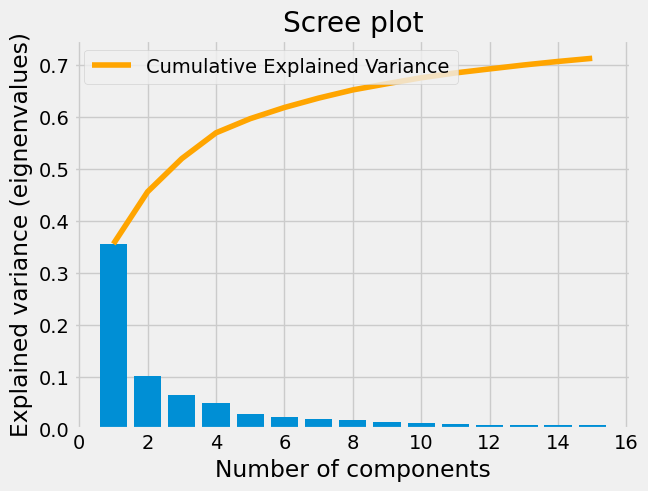

In [119]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_[0:15])+1),
    pca.explained_variance_ratio_[0:15]
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_[0:15])+1),
    np.cumsum(pca.explained_variance_ratio_[0:15]),
    c='orange',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

In [120]:
# initiate optimal knn model to test the optimal pca dimensions
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto',p=2)
# initiate optimal svm model to test optimal pca
svc=svm.SVC(C=0.1, gamma=1, kernel='poly',probability=True)

# percentage of explained variance to test
ncomponents = np.array([0.7,0.72,0.74,0.76,0.78,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,0.96])
test_Scores = []
svmtest_Scores = []

for i in ncomponents:
    tryPCA = PCA(n_components= i)
    transformed = tryPCA.fit_transform(images)
    basis = np.dot(transformed, tryPCA.components_)
    xtrain, xtest, ytrain, ytest = train_test_split(basis, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)
    knn.fit(xtrain, ytrain)
    svc.fit(xtrain, ytrain)
    ypredknn = knn.predict(xtest)
    knnout = accuracy_score(ytest, ypredknn)
    test_Scores.append(knnout)
    ypredsvc = svc.predict(xtest)
    svcout = accuracy_score(ytest, ypredsvc)
    svmtest_Scores.append(svcout)

In [125]:
print(test_Scores[3])
print(svmtest_Scores[2])
print(svmtest_Scores[3])

0.9030612244897959
0.9183673469387755
0.9132653061224489


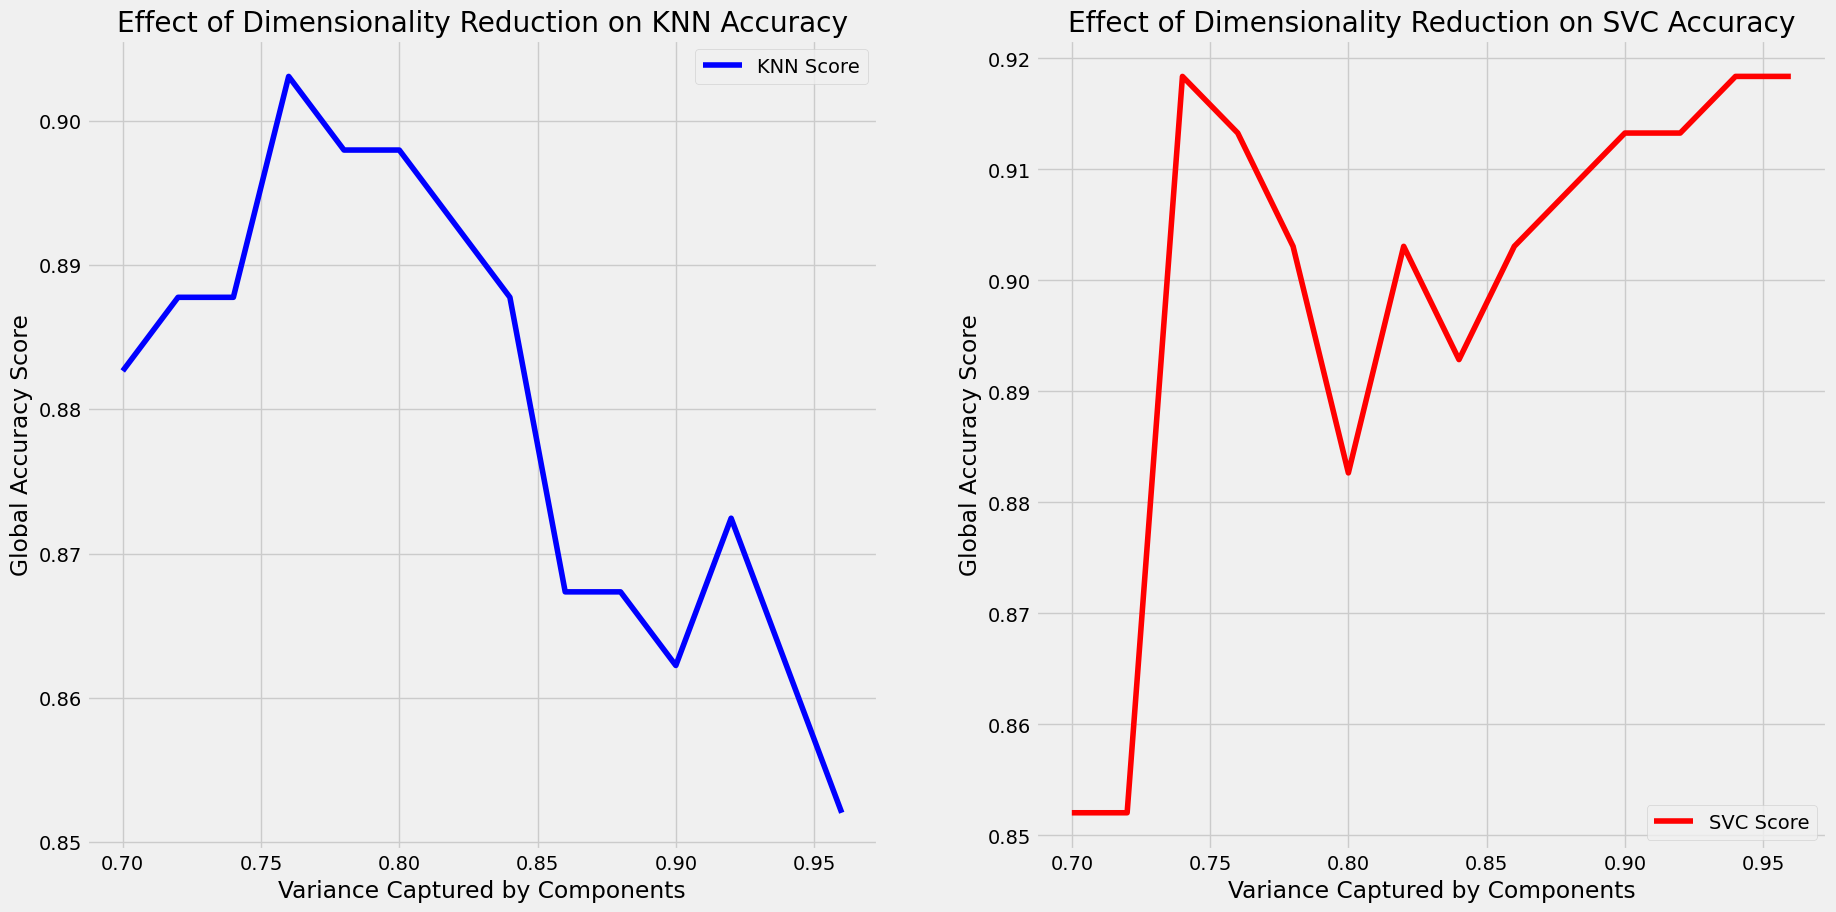

In [121]:
# compare results 

%matplotlib inline

plt.figure(figsize = [20,10])

plt.subplot(1,2,1)
plt.plot(ncomponents, test_Scores, color='b', label='KNN Score')
plt.xlabel('Variance Captured by Components')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Dimensionality Reduction on KNN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(ncomponents, svmtest_Scores, color='red',label='SVC Score')
plt.xlabel('Variance Captured by Components')
plt.ylabel('Global Accuracy Score')
plt.title('Effect of Dimensionality Reduction on SVC Accuracy')
plt.legend()
plt.show()

In [126]:
# recreate optimal combinations
bestPCA = PCA(n_components= 0.76)
transformed = bestPCA.fit_transform(images)
basis = np.dot(transformed, bestPCA.components_)
xtrain, xtest, ytrain, ytest = train_test_split(basis, labels, test_size=0.15, random_state=47, shuffle=True, stratify=labels)

# fit models again 
knn.fit(xtrain, ytrain)
svc.fit(xtrain, ytrain)

# predict 
pred_pcaknn = knn.predict(xtest)
knn_pca_score = accuracy_score(ytest, pred_pcaknn)
knn_pca_confusion = confusion_matrix(ytest, pred_pcaknn)
print("Overall Accuracy: {0:.2f}".format(knn_pca_score))

pred_pcasvc = svc.predict(xtest)
svc_pca_score = accuracy_score(ytest, pred_pcasvc)
svc_pca_confusion = confusion_matrix(ytest, pred_pcasvc)
print("Overall Accuracy: {0:.2f}".format(svc_pca_score))

Overall Accuracy: 0.90
Overall Accuracy: 0.91


27
Text(0.5, 1.0, '(Label: babydoll/trapeze)')
Text(0.5, 1.0, '(Label: bustier/hourglass)')
Text(0.5, 1.0, '(Label: tshirt/straight)')


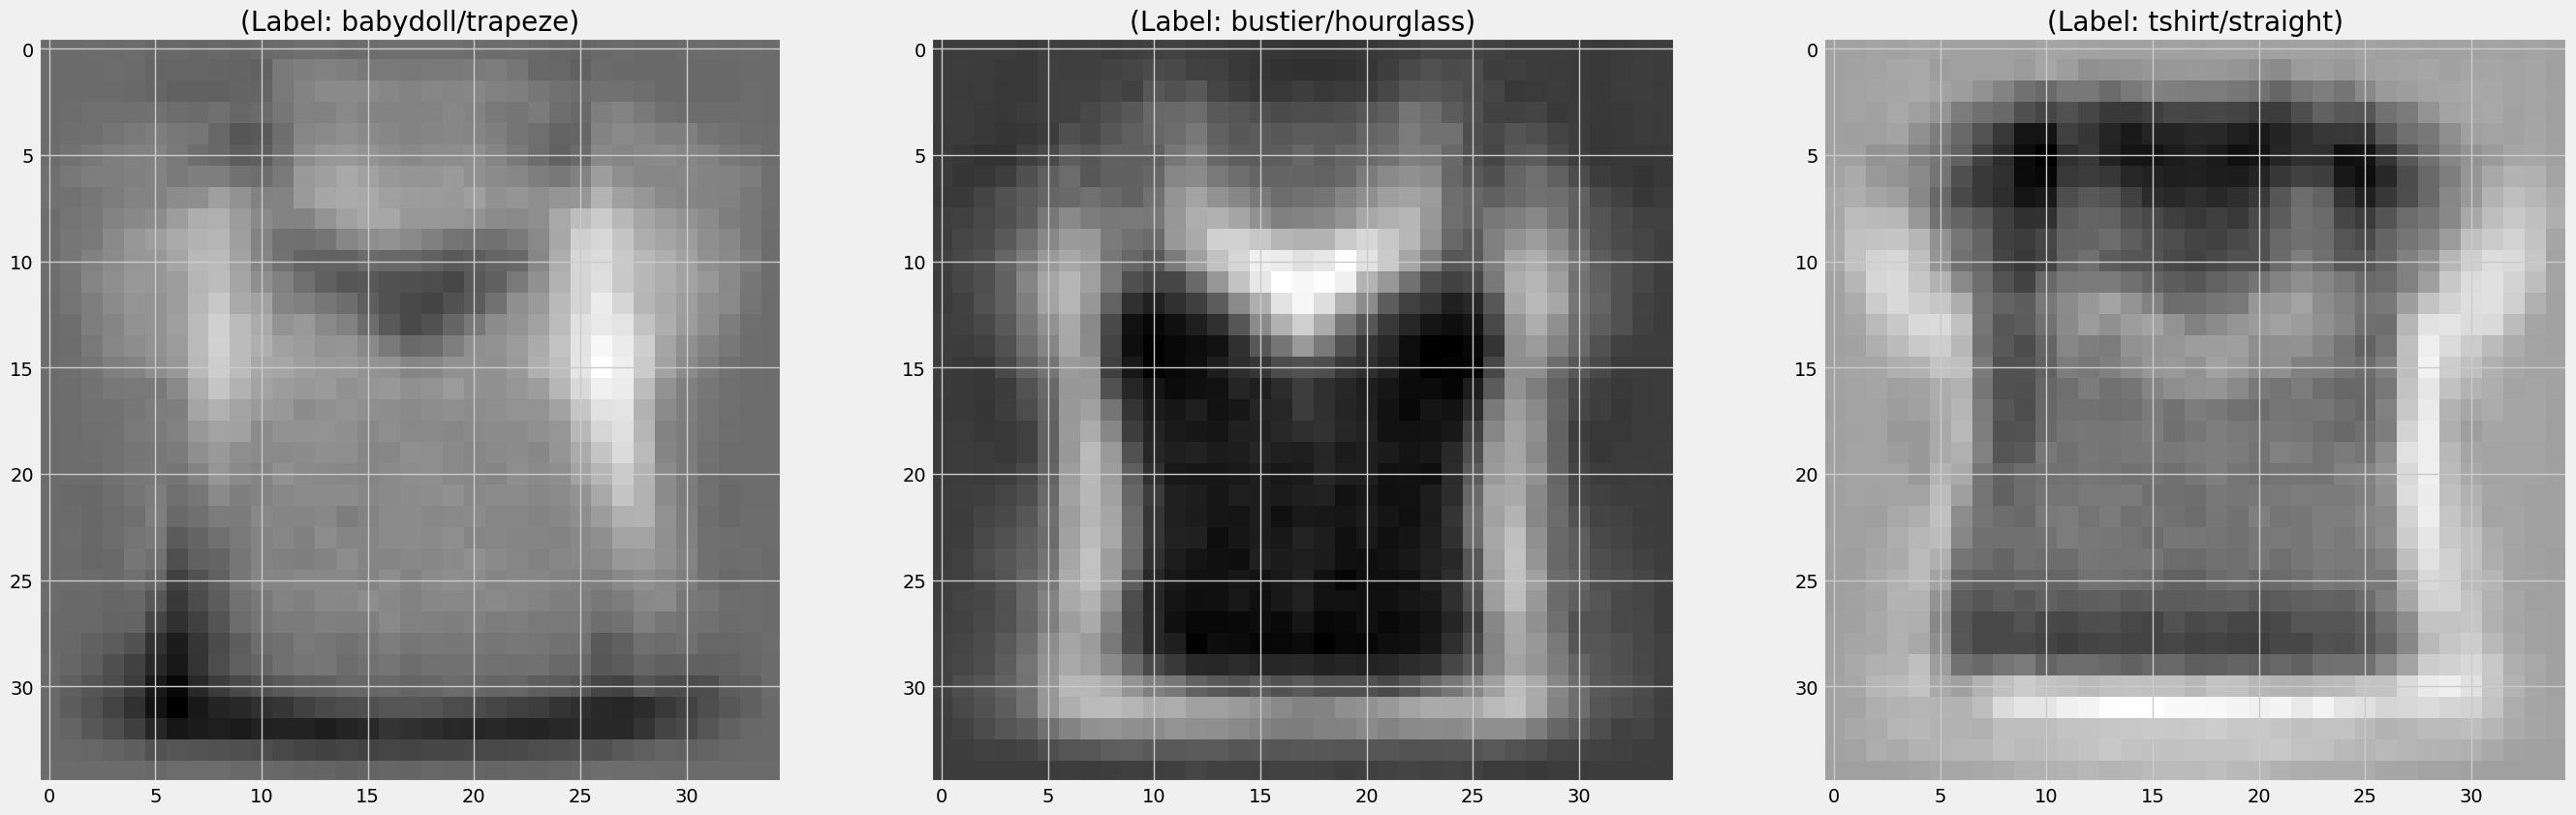

In [127]:
 # first image of each class RECONSTRUCTED AFTER PCA
# number of components kept
print(bestPCA.n_components_)
values = [0, 435, 870]
%matplotlib inline
plt.figure(figsize = [30,15])
for i in range(3):
    plt.subplot(1,3,i+1)
    im = np.reshape(basis[values[i]],(35,35))
    plt.imshow(im, cmap='gray_r')
    print(plt.title("(Label: " + str(label_list[labels[values[i]]]) + ")"))

In [129]:
# create df from svc-pca confusion matrix 
svcpcaFP = svc_pca_confusion.sum(axis=0) - np.diag(svc_pca_confusion)  
svcpcaFN = svc_pca_confusion.sum(axis=1) - np.diag(svc_pca_confusion)
svcpcaTP = np.diag(svc_pca_confusion)
svcpcaTN = svc_pca_confusion.sum() - (svcpcaFP + svcpcaFN + svcpcaTP)
# Sensitivity, hit rate, recall, or true positive rate
svcpcaTPR = svcpcaTP/(svcpcaTP+svcpcaFN)
# Specificity or true negative rate
svcpcaTNR = svcpcaTN/(svcpcaTN+svcpcaFP) 
# Overall accuracy
svcpcaACC = (svcpcaTP+svcpcaTN)/(svcpcaTP+svcpcaFP+svcpcaFN+svcpcaTN)
# create table
svcpca_df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': svcpcaFP, 'FN': svcpcaFN, 'TP': svcpcaTP, 'TN': svcpcaTN, 'SENSITIVITY': svcpcaTPR, 'SPECIFICITY': svcpcaTNR, 'ACCURACY': svcpcaACC})
svcpca_df.set_index('CLASS', inplace=True)

# create df from knn-pca confusion matrix 
knnpcaFP = knn_pca_confusion.sum(axis=0) - np.diag(knn_pca_confusion)  
knnpcaFN = knn_pca_confusion.sum(axis=1) - np.diag(knn_pca_confusion)
knnpcaTP = np.diag(knn_pca_confusion)
knnpcaTN = knn_pca_confusion.sum() - (knnpcaFP + knnpcaFN + knnpcaTP)
# Sensitivity, hit rate, recall, or true positive rate
knnpcaTPR = knnpcaTP/(knnpcaTP+knnpcaFN)
# Specificity or true negative rate
knnpcaTNR = knnpcaTN/(knnpcaTN+knnpcaFP) 
# Overall accuracy
knnpcaACC = (knnpcaTP+knnpcaTN)/(knnpcaTP+knnpcaFP+knnpcaFN+knnpcaTN)
# create table
knnpca_df = pd.DataFrame({'CLASS': np.array([0,1,2]), 'FP': knnpcaFP, 'FN': knnpcaFN, 'TP': knnpcaTP, 'TN': knnpcaTN, 'SENSITIVITY': knnpcaTPR, 'SPECIFICITY': knnpcaTNR, 'ACCURACY': knnpcaACC})
knnpca_df.set_index('CLASS', inplace=True)

## Kernel PCA Representation